# Project: Investigate a Dataset of (TMDB movie) 

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
> i choosed the (tmdb movie data ) and now iam gonna clean my dataset to make sure everything is fine

>iam gonna ask about 7  main question
* 1- What is the most movies got high profit and what is the genres that achieved high profit so when a producer decides to produce a film with a specific genre, he/she chooses the genre that is most guaranteed to achieve high profit
* 2- Does movies with high budget always achieve high profits compared to what was paid?
* 3- What is the highest genres rate ever
* 4- Which years have the highest movies rate
* 5- what is the correltion between high rate movies and high budget movies
* 6- what is the most frequency vote average users choosed
* 7- what is top 5 movies rate of action and adventure and comedy movies 

In [2]:
#import libraries i need in my project 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
#read the csv file of the dataset i choosed
df = pd.read_csv("tmdb-movies.csv")


<a id='wrangling'></a>
## Data Wrangling


### Data Cleaning 
> clean the data to make sure i got accurate results and remove data that i dont need to make the work on my data more easier and we need to add more columns to help us 

In [3]:
#remove columns i dont need
df.drop(columns=["vote_count","budget","revenue","popularity","runtime","id","imdb_id","cast","homepage","tagline","keywords","overview","production_companies","release_date","director"],inplace=True)
#check double rows and rows with null values and remove them or fill them with the mode
df.duplicated().sum()
df.drop_duplicates(inplace=True)
df.isnull().sum()
x="{}|{}".format(df.genres.mode()[0],df.genres.mode()[1])
df.fillna(x,inplace=True)
#fill 0s in budget_adj and revenue_adj with the mean
df.budget_adj.replace(0,df.budget_adj.mean(),inplace=True)
df.revenue_adj.replace(0,df.revenue_adj.mean(),inplace=True)

#add a column of the profit adj
df["profit_adj"]=df.revenue_adj-df.budget_adj
#add a column of the first genre of the genres because it is the main genre
df["main_genre"]=df.genres.apply(lambda x:x.split("|")[0])


### General Properties
> show up some rows of my data after remove columns i dont need and the statistic numbers of my data and some more informtion

In [4]:
#print the top 5 rows of my data
df.head()

,original_title,genres,vote_average,release_year,budget_adj,revenue_adj,profit_adj,main_genre
0,Jurassic World,Action|Adventure|Science Fiction|Thriller,6.5,2015,1.379999e+08,1.392446e+09,1.254446e+09,Action
1,Mad Max: Fury Road,Action|Adventure|Science Fiction|Thriller,7.1,2015,1.379999e+08,3.481613e+08,2.101614e+08,Action
2,Insurgent,Adventure|Science Fiction|Thriller,6.3,2015,1.012000e+08,2.716190e+08,1.704191e+08,Adventure
3,Star Wars: The Force Awakens,Action|Adventure|Science Fiction|Fantasy,7.5,2015,1.839999e+08,1.902723e+09,1.718723e+09,Action
4,Furious 7,Action|Crime|Thriller,7.3,2015,1.747999e+08,1.385749e+09,1.210949e+09,Action


In [5]:
#print the basic statistics
df.describe()

,vote_average,release_year,budget_adj,revenue_adj,profit_adj
count,10865.000000,10865.000000,1.086500e+04,1.086500e+04,1.086500e+04
mean,5.975012,2001.321859,2.675046e+07,7.981225e+07,5.306179e+07
std,0.935138,12.813260,3.051007e+07,1.365647e+08,1.206776e+08
min,1.500000,1960.000000,9.210911e-01,2.370705e+00,-4.139124e+08
25%,5.400000,1995.000000,1.754989e+07,5.136900e+07,2.017888e+07
50%,6.000000,2006.000000,1.754989e+07,5.136900e+07,3.381911e+07
75%,6.600000,2011.000000,2.085325e+07,5.136900e+07,3.905412e+07
max,9.200000,2015.000000,4.250000e+08,2.827124e+09,2.750137e+09


In [6]:
#print the dimension of my dataset
df.shape

(10865, 8)

<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1
>1- What is the most movies got high profit and what is the genres that achieved high profit so when a producer decides to produce a film with a specific genre, he/she chooses the genre that is most guaranteed to achieve high profit

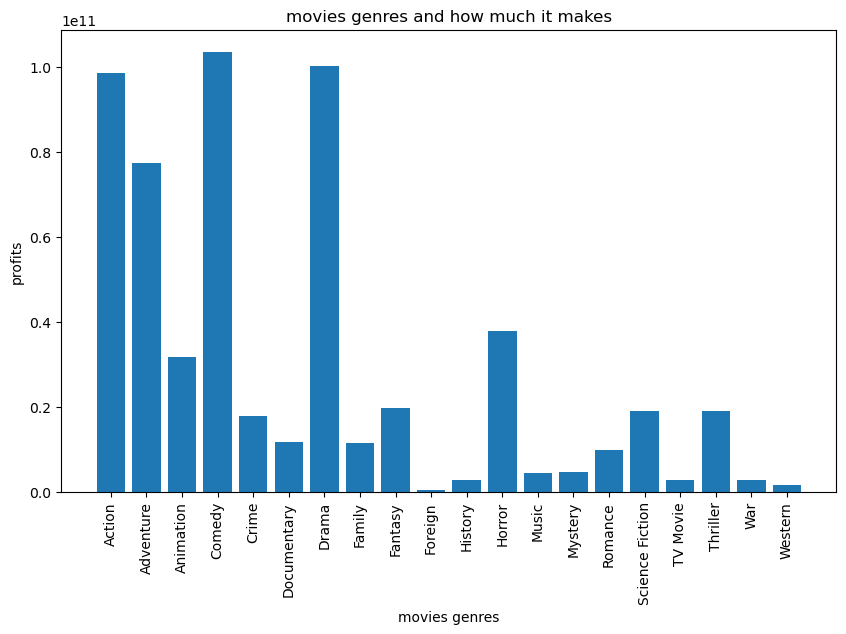

In [7]:
# group the data by main_genre and sum the profit_adj for each genre
genre_profits = df.groupby('main_genre')['profit_adj'].sum()
# get names of each genre and its value
name = genre_profits.index
value = genre_profits.values
#adjust how the bar gonna be printed
plt.figure(figsize=(10, 6))
plt.xticks(rotation=90)
plt.bar(name,value)
plt.title("movies genres and how much it makes")
plt.xlabel("movies genres")
plt.ylabel("profits");


>we can see that the top 3 genres that got high profit is (comedy , drama and action) movies so if any producer dont wanna to waste his/her money he/she should invest in that genres of movies

### Research Question 2
>2- Does movies with high budget always achieve high profits compared to what was paid?

Text(0, 0.5, 'profit')

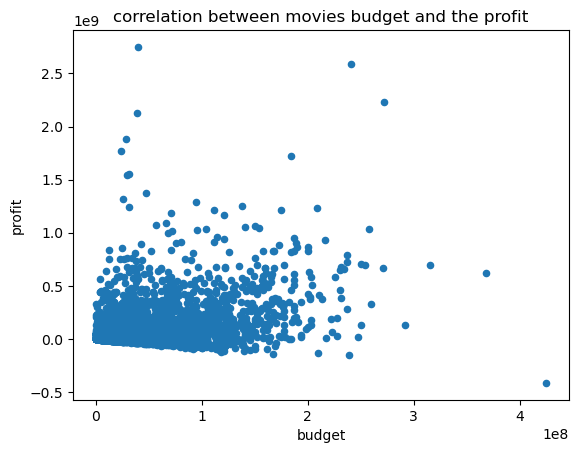

In [8]:
# make a scatter plot to see the correlation between budget and profit
df.plot(x="budget_adj",y="profit_adj",kind="scatter");
plt.title("correlation between movies budget and the profit")
plt.xlabel("budget")
plt.ylabel("profit")

> we can see that no correlation between high budget and high profit so you dont alwaye need to spend alot to get alot

### Research Question 3
>3- What is the highest genres rate ever


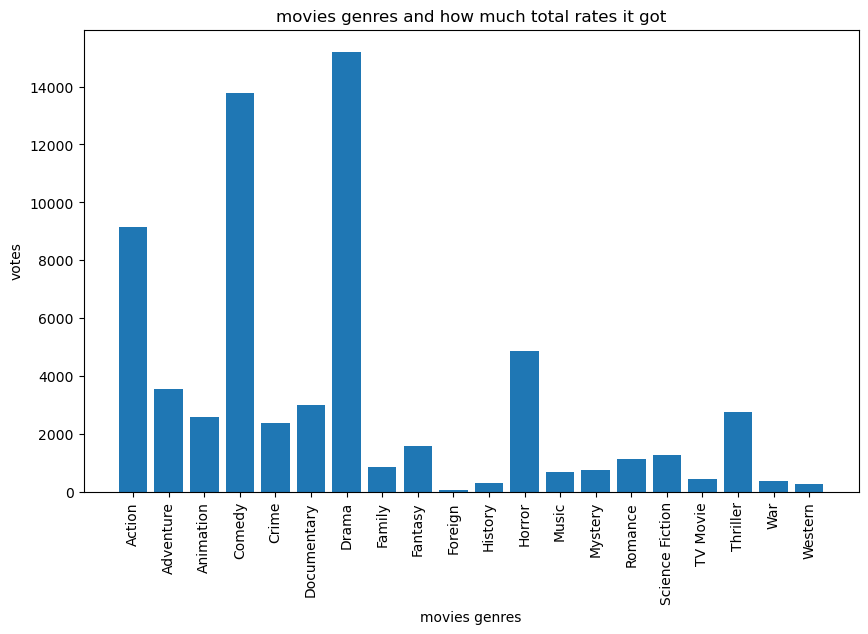

In [9]:
# group the data by main_genre and sum the vote_average for each genre
genre_votes = df.groupby('main_genre')['vote_average'].sum()
# get names of each genre and its value
name = genre_votes.index
value = genre_votes.values
#adjust how the bar gonna be printed
plt.figure(figsize=(10, 6))
plt.xticks(rotation=90)
plt.bar(name,value)
plt.title("movies genres and how much total rates it got")
plt.xlabel("movies genres")
plt.ylabel("votes");



> we can see that the highest genres vote is (drama,comedy and action)

### Research Question 4

>4- Which years have the highest movies rate

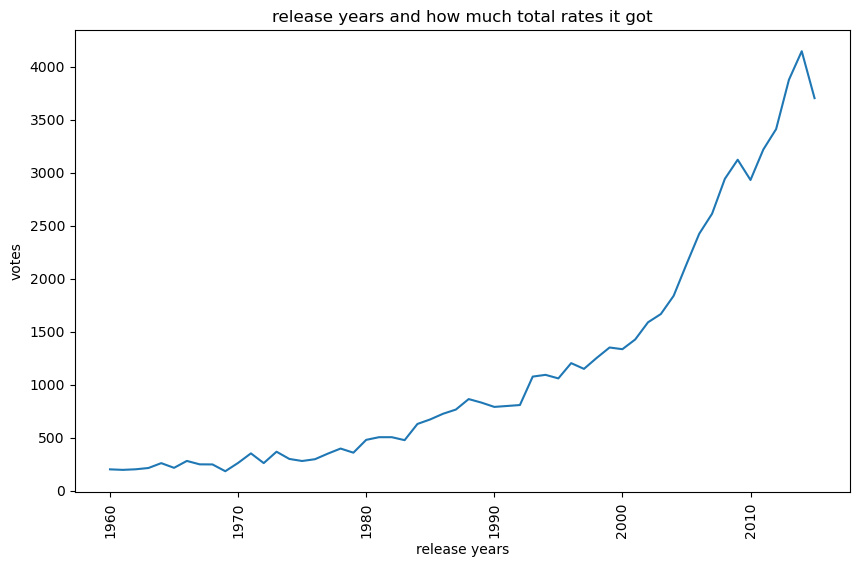

In [10]:
# group the data by release_year and sum the vote_average for each genre
year_votes = df.groupby('release_year')['vote_average'].sum()
# get names of each genre and its value
name = year_votes.index
value = year_votes.values
#adjust how the bar gonna be printed
plt.figure(figsize=(10, 6))
plt.xticks(rotation=90)
plt.plot(name,value)
plt.title("release years and how much total rates it got")
plt.xlabel("release years")
plt.ylabel("votes");



> we can see that the number of movies with high rate getting bigger by every year and prorbably its not because just movies of now is better but also because the popularity of the internet and rating movies exploded after 2010

### Research Question 5
>5- what is the correltion between high rate movies and high budget movies

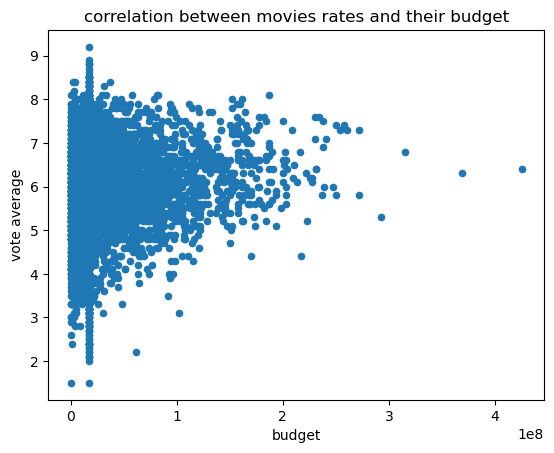

In [11]:
# make a scatter plot to see the correlation between high rate movies and high profit movies
df.plot(x="budget_adj",y="vote_average",kind="scatter")
plt.title("correlation between movies rates and their budget")
plt.ylabel("vote average")
plt.xlabel("budget");

> we can see that no correlation between high rate movies and high budget so you dont alwaye need to spend alot to get the like of the audience 

### Research Question 6
>6- what is the most frequency vote average users choosed

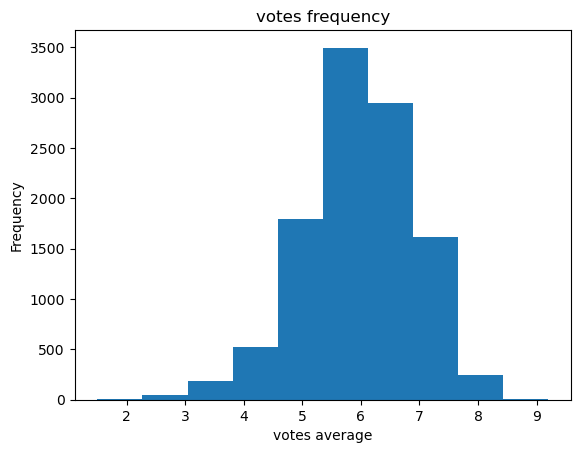

In [12]:
#make a hist plot to see frequency of each vote average
df.vote_average.plot(kind="hist")
plt.title("votes frequency")
plt.xlabel("votes average");

> we can see that the most frequency vote average is [5:6]

### Research Question 7
>7- what is top 5 movies rate of action and adventure and comedy movies 

In [13]:
#make a function to filter each 
def get_top_rated_movies_by_genre(genre):
  # Get all movies of the choosed genre
  genre_movies = df[df['main_genre'] == genre]
    
  # Sort the movies by their ratings
  top_rated_movies = genre_movies.sort_values(by='vote_average', ascending=False)
  
  # Return the top 5 movies
  return top_rated_movies.drop(columns={"genres"}).head()

In [14]:
#top 5 movies rating of action movies
get_top_rated_movies_by_genre("Action")

,original_title,vote_average,release_year,budget_adj,revenue_adj,profit_adj,main_genre
2722,Band of Brothers,8.0,2001,1.754989e+07,1.539360e+08,1.363861e+08,Action
630,Guardians of the Galaxy,7.9,2014,1.565855e+08,7.122911e+08,5.557057e+08,Action
1919,Inception,7.9,2010,1.600000e+08,8.255000e+08,6.655000e+08,Action
3110,Jodhaa Akbar,7.8,2008,8.483911e+06,1.316623e+07,4.682315e+06,Action
2410,The Matrix,7.8,1999,8.247033e+07,6.067687e+08,5.242984e+08,Action


In [15]:
#top 5 movies rating of comedy movies
get_top_rated_movies_by_genre("Comedy")

,original_title,vote_average,release_year,budget_adj,revenue_adj,profit_adj,main_genre
8839,Dave Chappelle: Killin' Them Softly,8.5,2000,1.754989e+07,5.136900e+07,3.381911e+07,Comedy
5830,Doctor Who: The Time of the Doctor,8.5,2013,1.754989e+07,5.136900e+07,3.381911e+07,Comedy
8370,Bill Hicks: Relentless,8.4,1992,1.754989e+07,5.136900e+07,3.381911e+07,Comedy
4547,London 2012 Olympic Opening Ceremony: Isles of...,8.3,2012,1.754989e+07,5.136900e+07,3.381911e+07,Comedy
6441,Babam ve oÄŸlum,8.2,2005,1.754989e+07,5.136900e+07,3.381911e+07,Comedy


In [16]:
#top 5 movies rating of drama movies
get_top_rated_movies_by_genre("Drama")

,original_title,vote_average,release_year,budget_adj,revenue_adj,profit_adj,main_genre
1200,Black Mirror: White Christmas,8.8,2014,1.754989e+07,5.136900e+07,3.381911e+07,Drama
5986,"Guten Tag, RamÃ³n",8.4,2013,3.744133e+06,5.136900e+07,4.762487e+07,Drama
4178,The Shawshank Redemption,8.4,1994,3.677779e+07,4.169346e+07,4.915674e+06,Drama
7269,The Godfather,8.3,1972,3.128737e+07,1.277914e+09,1.246626e+09,Drama
650,Whiplash,8.2,2014,3.039600e+06,1.288891e+07,9.849312e+06,Drama


<a id='conclusions'></a>
## Conclusions
this dataset have alot of useful informtion and other useless in our analyze so we deleted columns we dont need and filled columns of budget and revenue with zero values with the mean and filled the columns of genres with null values with the mode and we removed duplicated rows and we added 2 columns of profit and the main genre to make our work on the data easier
* we discovered that comedy, drama and action movies is the most genre that got high profit
* we discovered that high budget movies dont always got high profit 
* we discovered that drama, comedy and action movies is the most genre that got high rate by the users
* we discovered that not always high profit movies got high rate by the users
### limitations
* 1- i could have asked more important questions to get more important and useful information
* 2- i could have used more functions in my code to make make it easier
* 3- i could have visualize the results in a way better way to the end user
* 4- i could have keep asking more questions to find a stronger correltion between varibales
* 5- there was alot of missing data on the budget and revenue so i dont know if fill it with the mean was the best option or not


In [65]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'investigate-a-dataset-TMDB.ipynb'])

1